## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import pickle

In [11]:
from sklearn.linear_model import LogisticRegression

### Risk data

In [7]:
with open('risk_credit.pkl', 'rb') as f:
    x_risk_data, y_risk_data = pickle.load(f)

In [8]:
x_risk_data.shape, y_risk_data.shape

((14, 4), (14,))

In [5]:
x_risk_data, y_risk_data

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [9]:
#deleting moderate cases (for y) = rows 2,7,11
x_risk_data = np.delete(x_risk_data,[2,7,11], axis = 0)
y_risk_data = np.delete(y_risk_data,[2,7,11], axis = 0)

In [10]:
x_risk_data.shape, y_risk_data.shape

((11, 4), (11,))

In [12]:
logistic = LogisticRegression(random_state = 1)
logistic.fit(x_risk_data,y_risk_data)

LogisticRegression(random_state=1)

In [14]:
logistic.intercept_, logistic.coef_

(array([-0.80855152]),
 array([[-0.76706797,  0.23921064, -0.47989768,  1.12196145]]))

These are the $\beta_0$ and $\beta_x$

In [15]:
#case1: history: good, debt: high, guarantee: none, income: >35
#                0            0                 1           2

#case2: history: bad, debt: high, guarantee: adequate, income: <15
#                2            0                 0           0
prediction = logistic.predict([[0,0,1,2],[2,0,0,0]])
prediction

array(['baixo', 'alto'], dtype=object)

### Credit data

In [16]:
with open('credit.pkl', 'rb') as f:
    x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [17]:
x_credit_training.shape, y_credit_training.shape, x_credit_test.shape, y_credit_test.shape

((1500, 3), (1500,), (500, 3), (500,))

In [18]:
logistic = LogisticRegression(random_state = 1)
logistic.fit(x_credit_training,y_credit_training)

LogisticRegression(random_state=1)

In [19]:
logistic.intercept_, logistic.coef_

(array([-6.03332474]), array([[-2.55275116, -3.72391223,  3.94333005]]))

In [20]:
prediction = logistic.predict(x_credit_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [21]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_test,prediction)

0.946

0.946

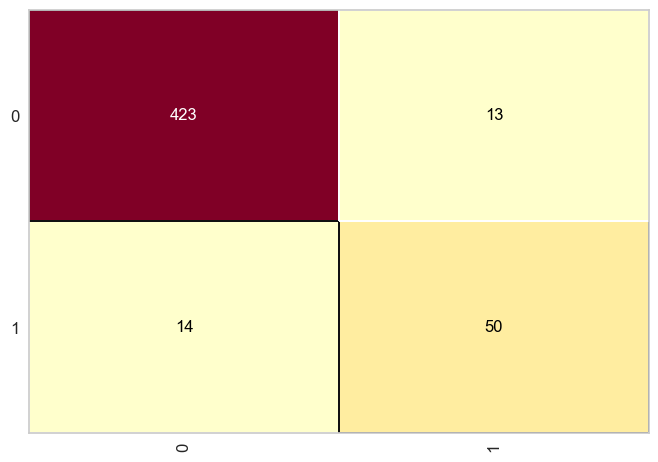

In [23]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(logistic)
confusion_matrix.fit(x_credit_training,y_credit_training)
confusion_matrix.score(x_credit_test,y_credit_test)

In [24]:
print(classification_report(y_credit_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



### Census data

In [25]:
with open('census.pkl', 'rb') as f:
    x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [27]:
x_census_training.shape, y_census_training.shape, x_census_test.shape, y_census_test.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [28]:
logistic = LogisticRegression(random_state = 1)
logistic.fit(x_census_training,y_census_training)

LogisticRegression(random_state=1)

In [29]:
logistic.intercept_, logistic.coef_

(array([-2.10552416]),
 array([[-6.98488613e-02,  1.18355815e-01, -9.28364487e-03,
         -6.32571637e-02,  5.70026706e-02,  5.07381719e-02,
         -8.84284931e-02, -5.02268816e-02, -1.24694668e-01,
         -1.02481824e-01, -1.17822786e-01, -3.66227818e-02,
         -1.89874033e-02, -2.67960548e-02, -8.22889018e-02,
         -7.88822810e-02, -8.12332696e-03,  1.13390793e-02,
          1.45986267e-01,  1.18924828e-01, -7.54038219e-02,
          1.44347173e-01, -5.54400102e-01,  1.13453107e-01,
          2.46279059e-02, -1.90450912e-01,  4.34375255e-02,
          7.00139994e-01, -6.46427239e-02, -5.18599668e-01,
         -1.07259785e-01, -8.85445200e-02, -7.37373311e-02,
         -1.37206225e-02, -2.06416506e-02,  2.26862374e-02,
          2.52008753e-01, -1.67994077e-01, -1.41452274e-01,
         -8.40072161e-02, -2.57017139e-01, -2.82516289e-01,
          1.61879470e-01,  8.58540408e-02,  8.36697148e-02,
          1.09051852e-01, -2.53383593e-02, -2.30592713e-02,
          1.32752

In [30]:
prediction = logistic.predict(x_census_test)
prediction

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [31]:
accuracy_score(y_census_test,prediction)

0.8497441146366428

0.8497441146366428

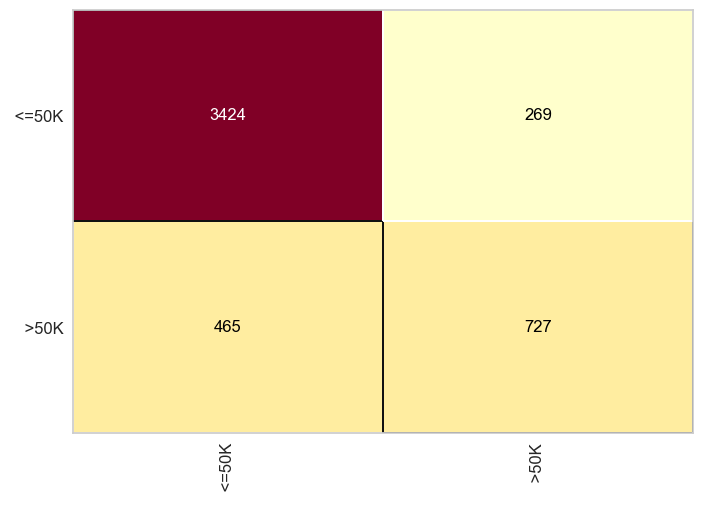

In [32]:
confusion_matrix = ConfusionMatrix(logistic)
confusion_matrix.fit(x_census_training,y_census_training)
confusion_matrix.score(x_census_test,y_census_test)

In [33]:
print(classification_report(y_census_test,prediction))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

